# Post Training Quantiation

In [2]:
import torch

net = torch.load('assets/vit_base_patch16_224.pth')

UnpicklingError: invalid load key, '<'.

# Activation Sparsity

in_channel: 96, out_channel: 384, pixel_num: 16


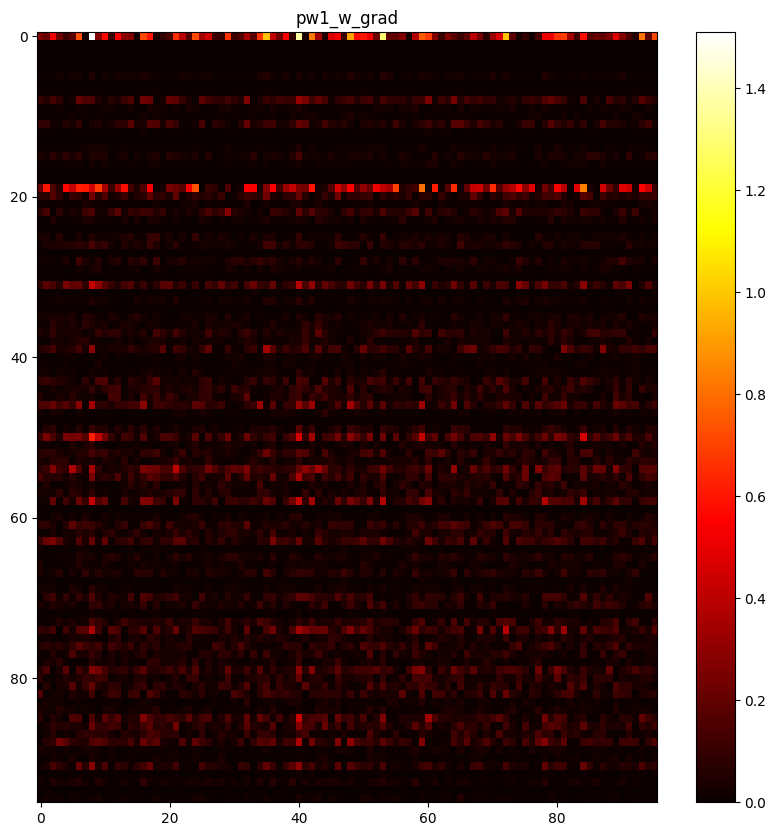

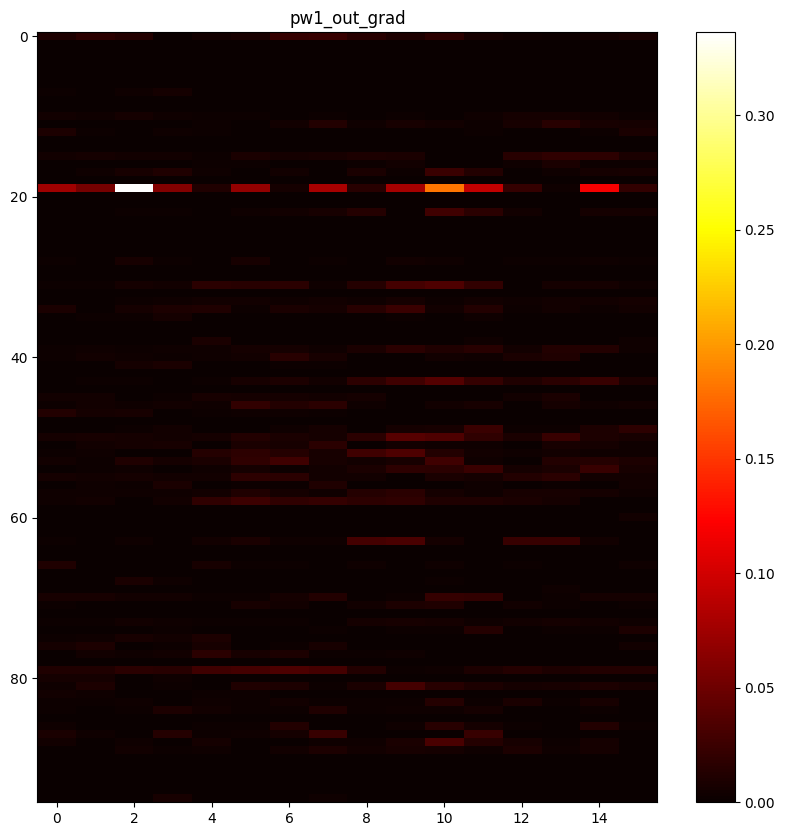

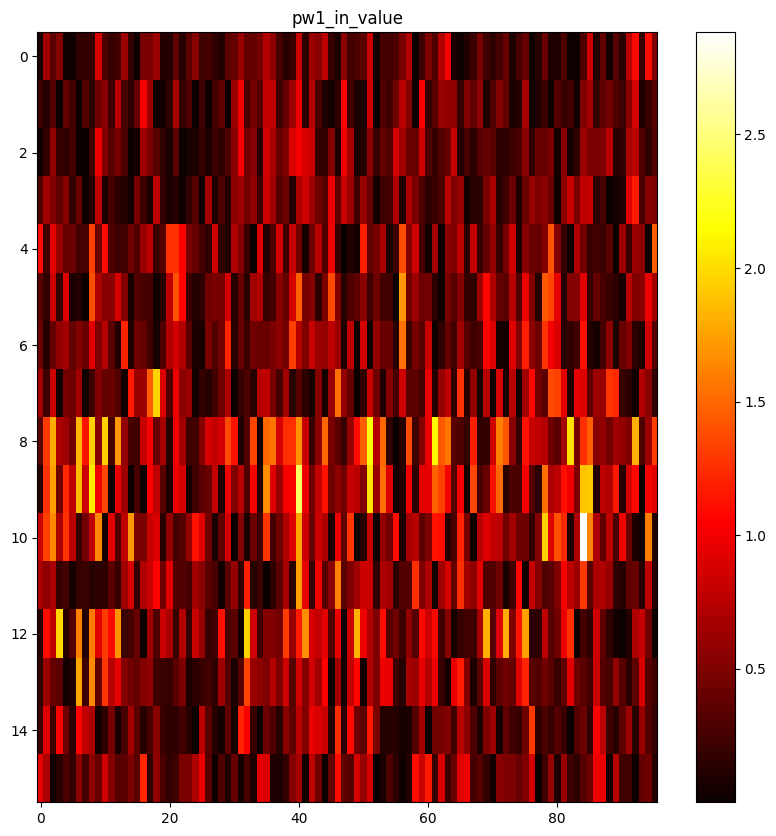

In [1]:
import torch
import matplotlib.pyplot as plt

pw1_w_grad, pw1_in_grad, pw1_out_grad, pw1_in_value, pw1_out_value, dw_w, dw_out_grad, pw2_w, pw2_out_grad = torch.load('temp/debug_data_-2.pt', map_location='cpu')

pw1_w_grad = pw1_w_grad.sum([2,3])
in_channel = pw1_in_grad.size(1)
out_channel = pw1_out_grad.size(1)
pixel_num = pw1_in_grad.shape[2] * pw1_in_grad.shape[3]

print(f'in_channel: {in_channel}, out_channel: {out_channel}, pixel_num: {pixel_num}')

pw1_in_value_0 = pw1_in_value[0].view(in_channel, -1)
pw1_out_value_0 = pw1_out_value[0].view(out_channel, -1)

pw1_out_grad_0 = pw1_out_grad[0].view(out_channel, -1)
dw_out_grad_0 = dw_out_grad[0].view(out_channel, -1)
pw2_out_grad_0 = pw2_out_grad[0].view(out_channel, -1)

# dw w filter magnitude
dw_w_channel_mag = dw_w.sum([1,2,3])

pw1_out_grad_channel_mag = pw1_out_grad_0.sum(1)
pw1_out_grad_pixel_mag = pw1_out_grad_0.sum(0)

pw1_in_value_channel_mag = pw1_in_value_0.sum(1)
pw1_in_value_pixel_mag = pw1_in_value_0.sum(0)

matrices = (pw1_w_grad.abs(), pw1_out_grad_0.abs(), pw1_in_value_0.abs().T)
matrices_name = ('pw1_w_grad', 'pw1_out_grad', 'pw1_in_value')

# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for i in range(len(matrices)):
#     im1 = axs[i].imshow(matrices[i], cmap='hot', interpolation='nearest')
#     fig.colorbar(im1, ax=axs[i])
#     axs[i].set_aspect('equal')
#     axs[i].set_title(f'{matrices_name[i]}')

for i in range(len(matrices)):
    plt.figure(figsize=(10, 10))
    plt.imshow(matrices[i][0:96,:], cmap='hot', interpolation='nearest', aspect='auto')
    plt.title(f'{matrices_name[i]}')
    plt.colorbar()
    plt.show()


### Patchwise 1

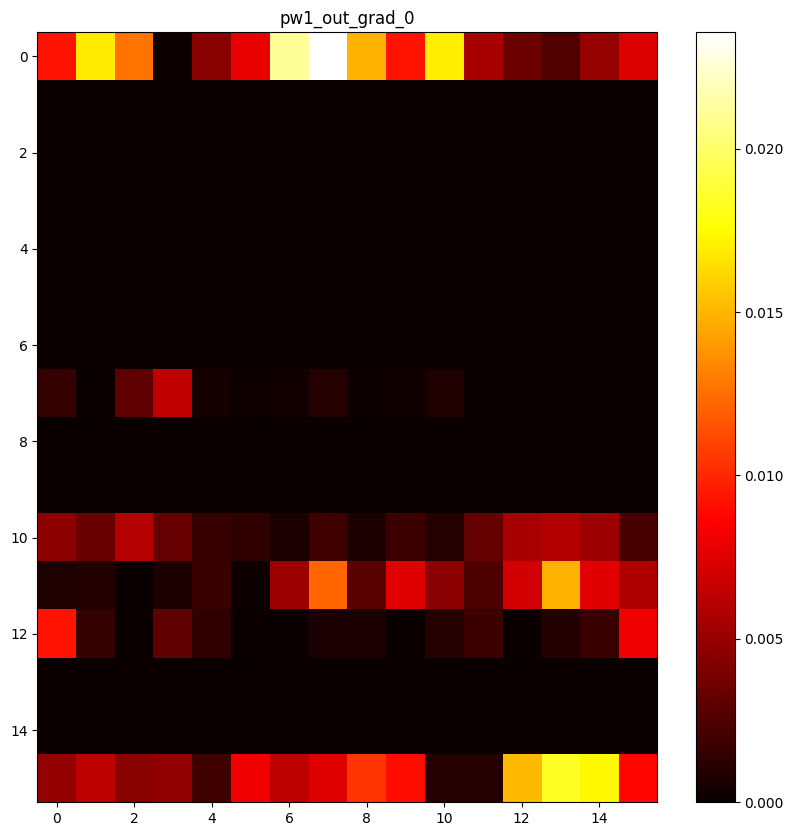

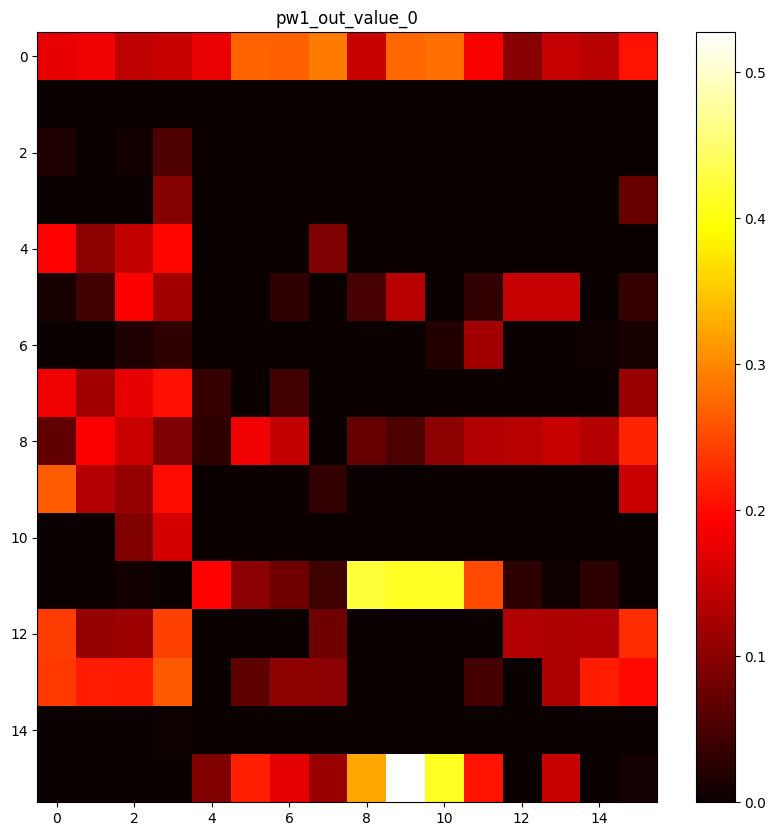

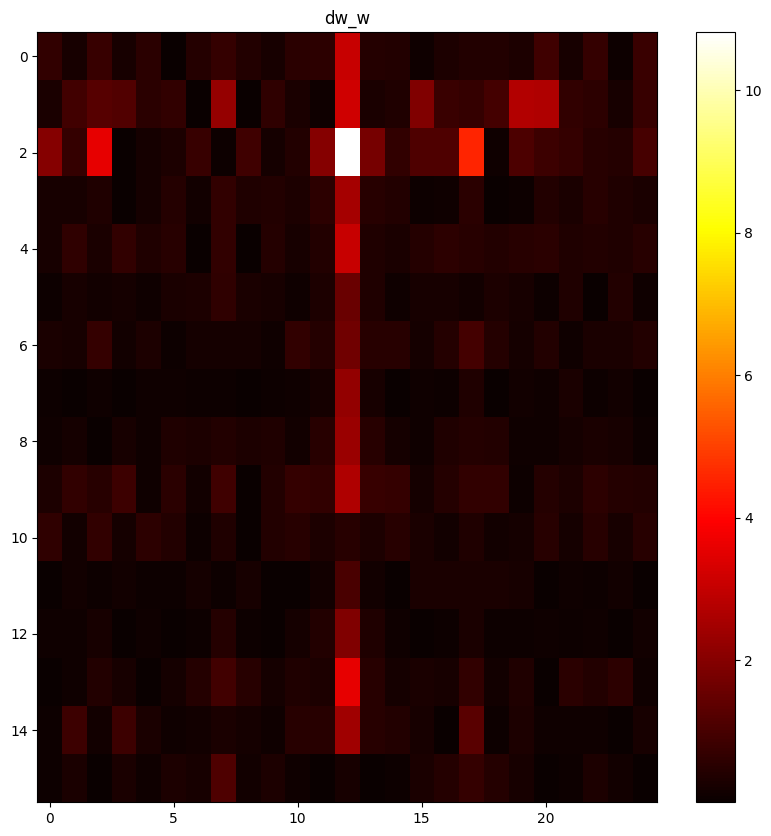

In [2]:
matrices = (pw1_out_grad_0.abs(), pw1_out_value_0.abs(), dw_w.abs().view(out_channel, -1))
matrices_name = ('pw1_out_grad_0', 'pw1_out_value_0', 'dw_w')

# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for i in range(len(matrices)):
#     im1 = axs[i].imshow(matrices[i], cmap='hot', interpolation='nearest')
#     fig.colorbar(im1, ax=axs[i])
#     axs[i].set_aspect('equal')
#     axs[i].set_title(f'{matrices_name[i]}')

for i in range(len(matrices)):
    plt.figure(figsize=(10, 10))
    plt.imshow(matrices[i][0:16,:], cmap='hot', interpolation='nearest', aspect='auto')
    plt.title(f'{matrices_name[i]}')
    plt.colorbar()
    plt.show()

### Depth wise layer

Larger dw_w channel filter, larger pw1_out_grad channel

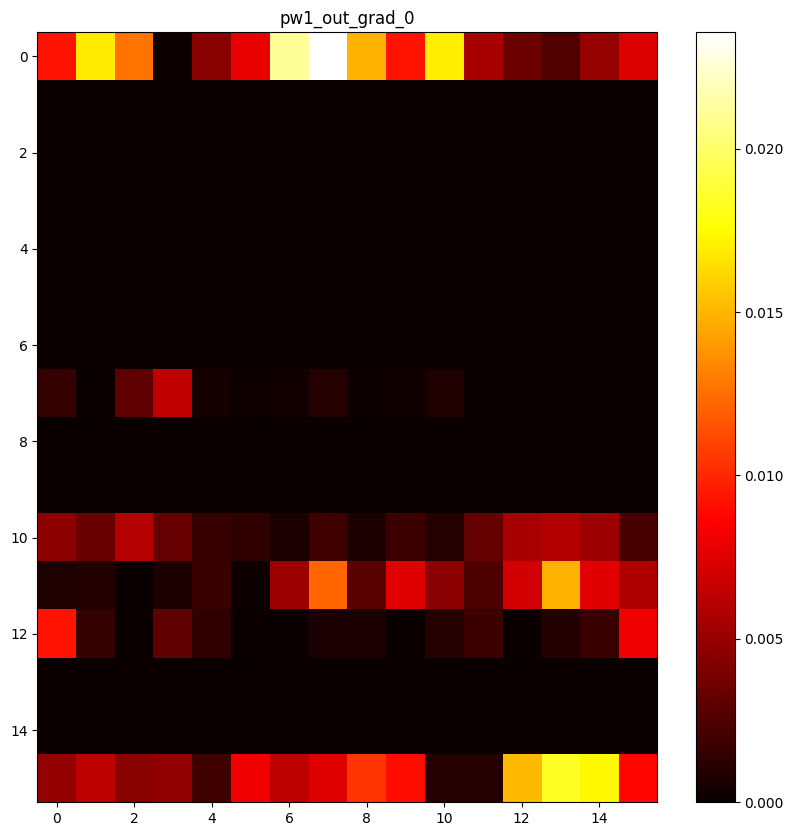

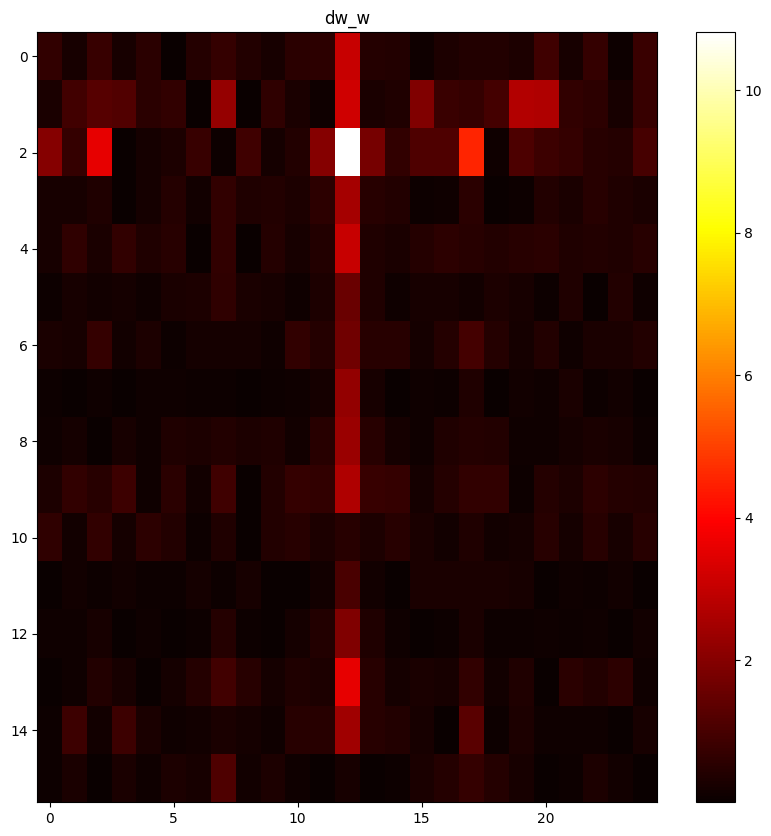

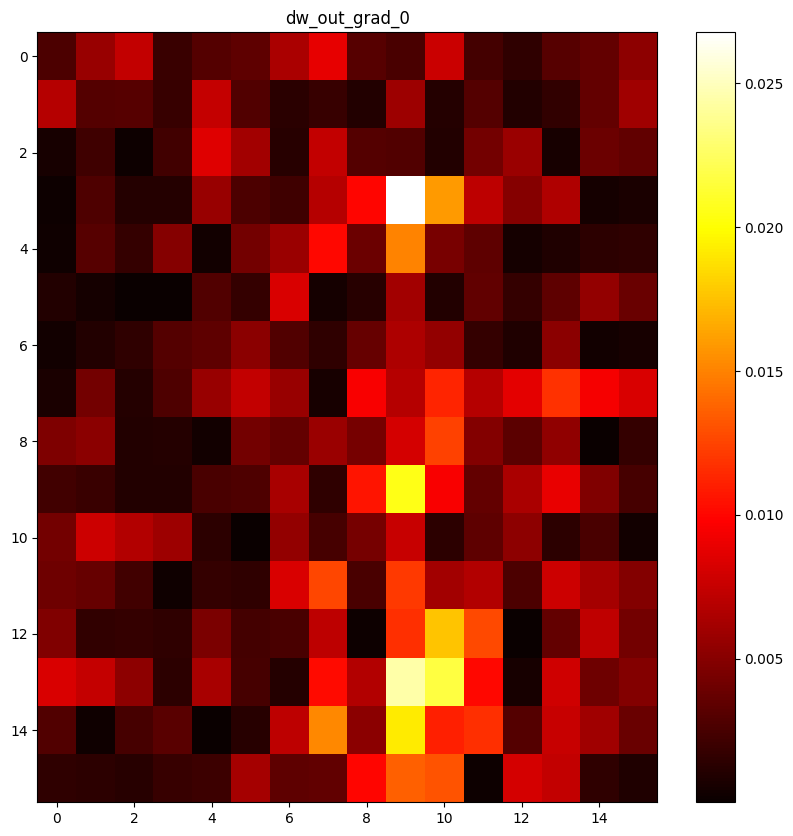

In [3]:
matrices = (pw1_out_grad_0.abs(), dw_w.abs().view(out_channel, -1), dw_out_grad_0.abs().view(out_channel, -1))
matrices_name = ('pw1_out_grad_0', 'dw_w', 'dw_out_grad_0')

# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for i in range(len(matrices)):
#     im1 = axs[i].imshow(matrices[i], cmap='hot', interpolation='nearest')
#     fig.colorbar(im1, ax=axs[i])
#     axs[i].set_aspect('equal')
#     axs[i].set_title(f'{matrices_name[i]}')

for i in range(len(matrices)):
    plt.figure(figsize=(10, 10))
    plt.imshow(matrices[i][0:16,:], cmap='hot', interpolation='nearest', aspect='auto')
    plt.title(f'{matrices_name[i]}')
    plt.colorbar()
    plt.show()

### pw2

larger pw2 weight 

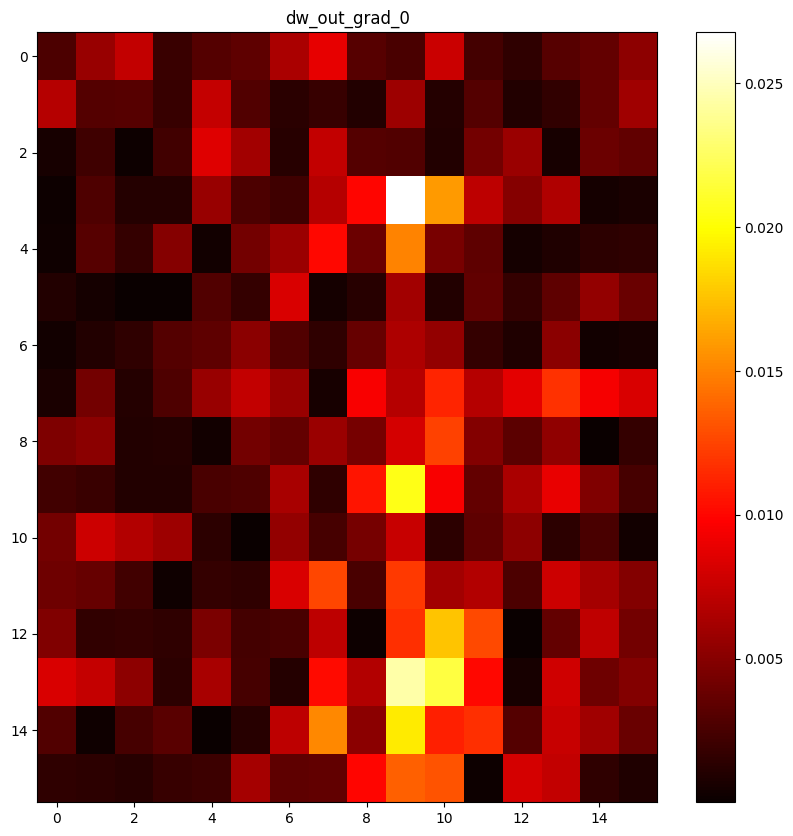

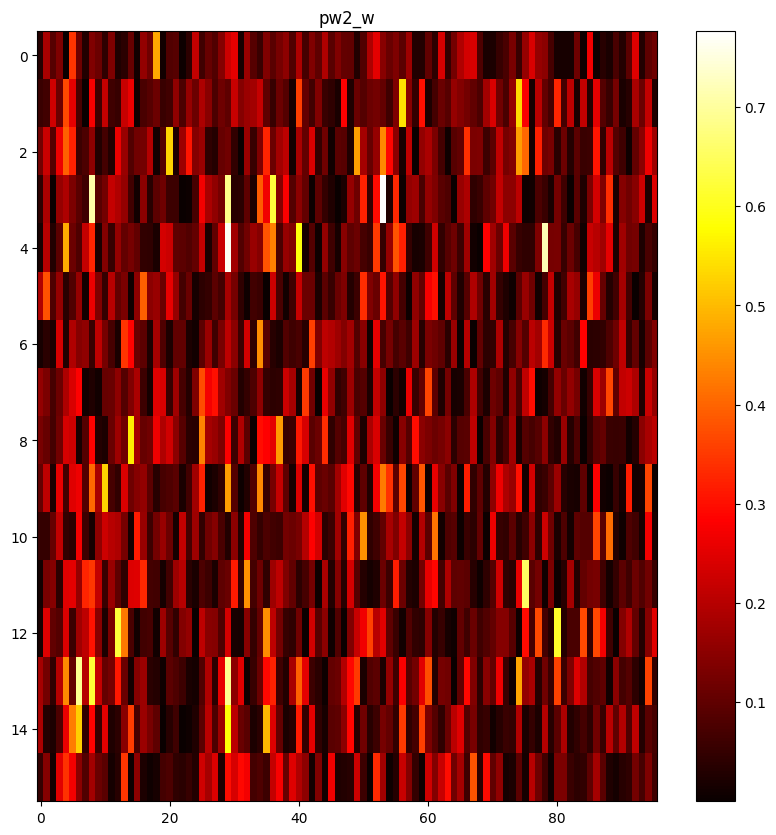

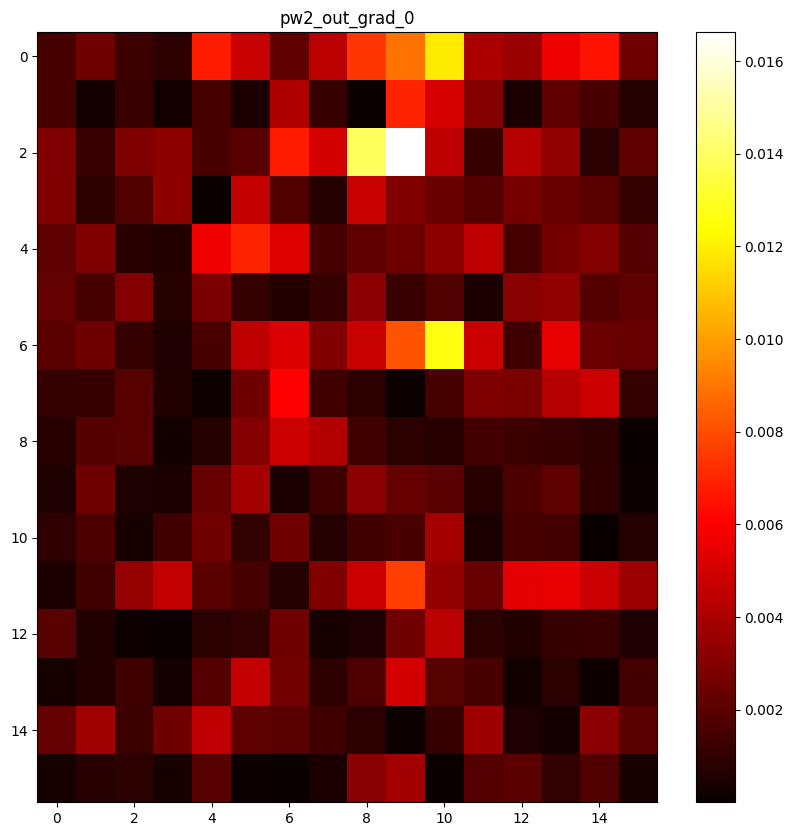

In [4]:
matrices = (dw_out_grad_0.abs(), pw2_w.squeeze().abs().T, pw2_out_grad_0.abs().view(in_channel, -1))
matrices_name = ('dw_out_grad_0', 'pw2_w', 'pw2_out_grad_0')

# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for i in range(len(matrices)):
#     im1 = axs[i].imshow(matrices[i], cmap='hot', interpolation='nearest')
#     fig.colorbar(im1, ax=axs[i])
#     axs[i].set_aspect('equal')
#     axs[i].set_title(f'{matrices_name[i]}')

for i in range(len(matrices)):
    plt.figure(figsize=(10, 10))
    plt.imshow(matrices[i][0:16,:], cmap='hot', interpolation='nearest', aspect='auto')
    plt.title(f'{matrices_name[i]}')
    plt.colorbar()
    plt.show()

### Our grad & out value: no relationship

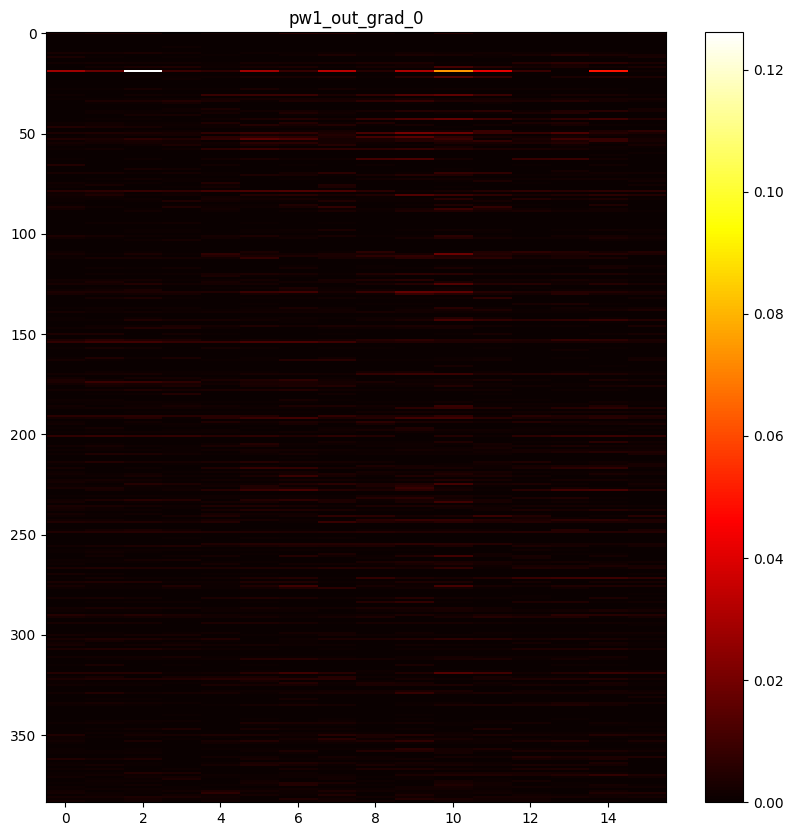

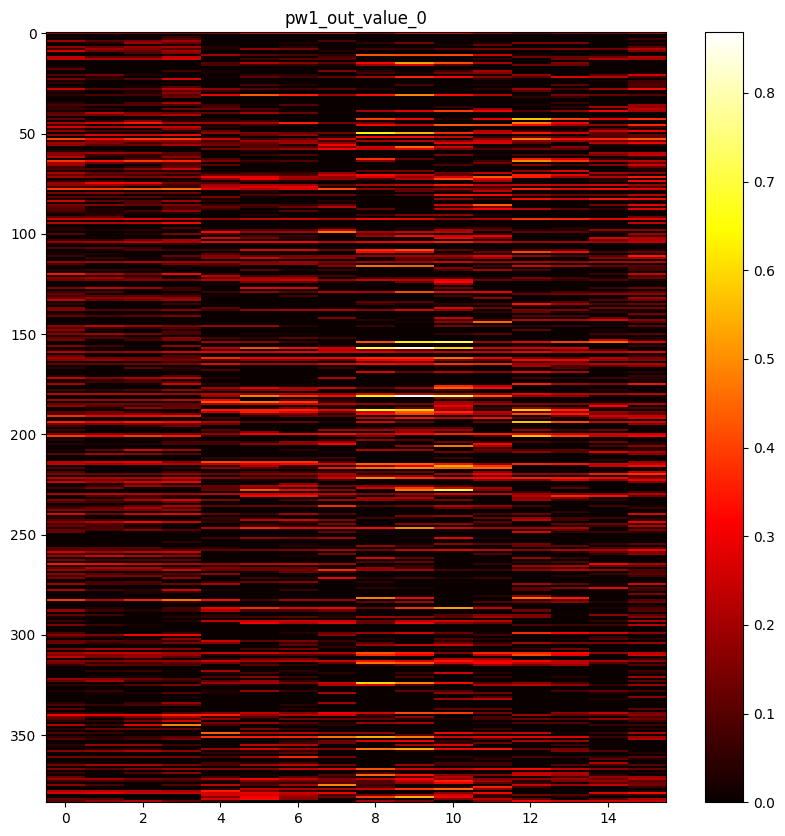

In [ ]:
matrices = (pw1_out_grad_0.abs(), pw1_out_value_0.abs())
matrices_name = ('pw1_out_grad_0', 'pw1_out_value_0')

# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# for i in range(len(matrices)):
#     im1 = axs[i].imshow(matrices[i], cmap='hot', interpolation='nearest')
#     fig.colorbar(im1, ax=axs[i])
#     axs[i].set_aspect('equal')
#     axs[i].set_title(f'{matrices_name[i]}')

for i in range(len(matrices)):
    plt.figure(figsize=(10, 10))
    plt.imshow(matrices[i], cmap='hot', interpolation='nearest', aspect='auto')
    plt.title(f'{matrices_name[i]}')
    plt.colorbar()
    plt.show()

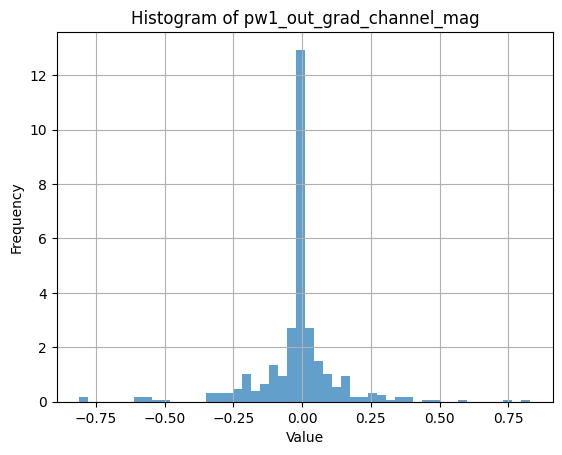

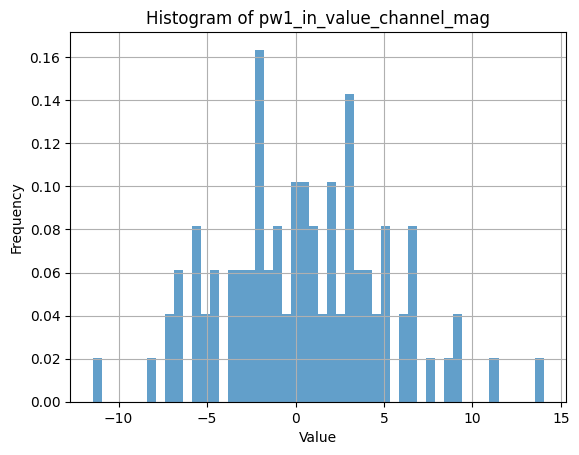

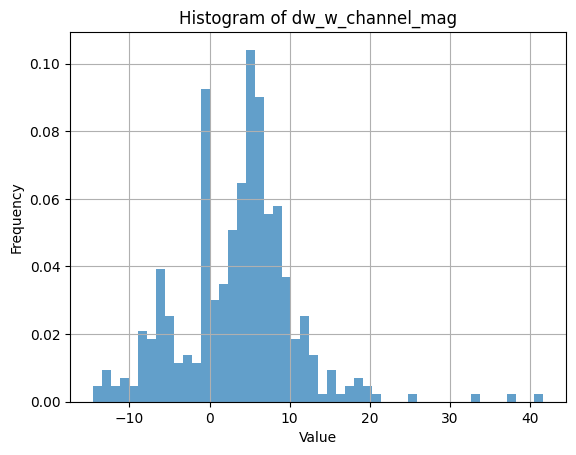

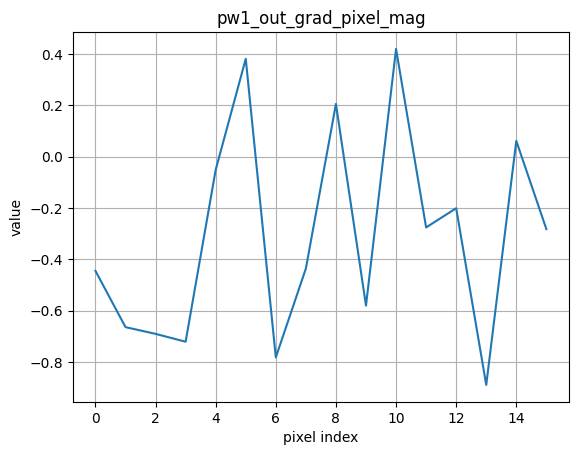

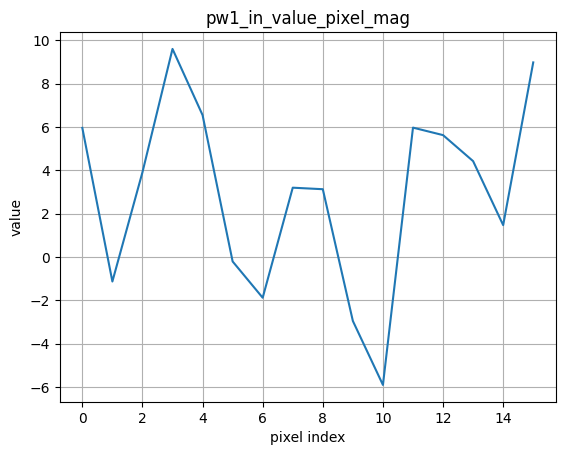

In [3]:
# Plot histogram
to_plot = (pw1_out_grad_channel_mag, pw1_in_value_channel_mag, dw_w_channel_mag)
to_plot_name = ('pw1_out_grad_channel_mag', 'pw1_in_value_channel_mag', 'dw_w_channel_mag')

for i in range(len(to_plot)):
    # histogram
    plt.hist(to_plot[i], bins=50, density=True, alpha=0.7)  # Adjust the number of bins as needed
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {to_plot_name[i]}')
    plt.grid(True)
    plt.show()

    # plt.plot(range(len(to_plot[i])), to_plot[i])  # Adjust the number of bins as needed
    # plt.xlabel('pixel index')
    # plt.ylabel('value')
    # plt.title(f'{to_plot_name[i]}')
    # plt.grid(True)
    # plt.show()

to_plot = (pw1_out_grad_pixel_mag, pw1_in_value_pixel_mag)
to_plot_name = ('pw1_out_grad_pixel_mag', 'pw1_in_value_pixel_mag')

for i in range(len(to_plot)):
    plt.plot(range(len(to_plot[i])), to_plot[i])  # Adjust the number of bins as needed
    plt.xlabel('pixel index')
    plt.ylabel('value')
    plt.title(f'{to_plot_name[i]}')
    plt.grid(True)
    plt.show()